In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("denseML_0007_20220531_2018.sqlite3")

df = pd.read_sql_query("""select tv.timestamp, voltage, temperature
                          from  ts_voltage as tv, ts_temperature as tt
                          where tv.timestamp == tt.timestamp""", con)
con.close()





In [11]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [12]:
# Verify that result of SQL query is stored in the dataframe

print(df.head())

            timestamp  voltage  temperature
0 2022-05-05 09:00:00     1.54           20
1 2022-05-05 10:00:00     1.54           21
2 2022-05-05 11:00:00     1.54           22
3 2022-05-05 12:00:00     1.53           24
4 2022-05-05 13:00:00     1.53           27


(0.9, 1.6)

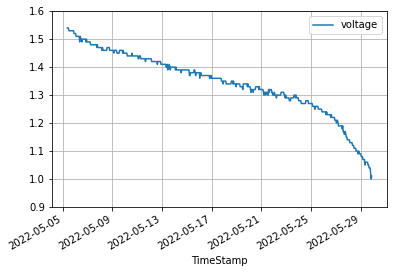

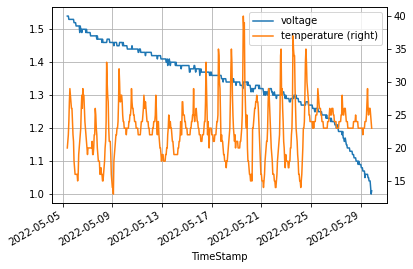

In [13]:
ax1 = df.plot(x='timestamp', y='voltage', grid=True, xlabel='TimeStamp')
ax2 = df.plot(x='timestamp', secondary_y='temperature', grid=True, xlabel='TimeStamp')

ax1.set_ylim(0.9, 1.6)


In [14]:
ts = pd.to_datetime(df["timestamp"])

In [15]:
ts

0     2022-05-05 09:00:00
1     2022-05-05 10:00:00
2     2022-05-05 11:00:00
3     2022-05-05 12:00:00
4     2022-05-05 13:00:00
              ...        
583   2022-05-29 17:00:00
584   2022-05-29 18:00:00
585   2022-05-29 19:00:00
586   2022-05-29 20:00:00
587   2022-05-29 21:00:00
Name: timestamp, Length: 588, dtype: datetime64[ns]